# Intelcom Data Science Challenge

### Table of content
 1. Introduction
 2. Data Understanding
 3. Exploratory Data Analysis
 4. Modeling 


# 1. Introduction

### <b>Data characteristics:</b> 
I am provided with a .csv file with multiple feature columns and a label column


### <b>Objective:</b> 

This notebook is for a challenge for a Data Scientist job opening at Intelcom Express.

The goals is to build a model that takes as input the feature columns and outputs a predicted label.





# 2. Data Understanding

### 2.1 Importation of the libraries to be used during this study

In [152]:
%matplotlib inline
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from IPython.display import HTML

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

import datetime 


In [153]:
data = pd.read_csv("DataScienceChallenge.csv")
data.dropna(axis='rows', inplace=True) # we drop rows with NA values
data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


### 2.2 Data manipulations prior to analysis

In [154]:
data['Clicked on Ad'] = pd.to_numeric(data['Clicked on Ad'],errors='coerce')
data['Daily Time Spent on Site'] = pd.to_numeric(data['Daily Time Spent on Site'],errors='coerce')
data['Timestamp'] = data['Timestamp'].str[:10]
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

print(data.dtypes)

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object


In [155]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13,0


In [156]:
print(data.dtypes)

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object


### 2.3 Variables Description

#### Quantitave data:
<li><b>Daily Time Spent on Site:</b>  The amount of time spent on a website per day (min)</li>
<li><b>Age:</b> Age of the user (years)</li>
<li><b>Area Income:</b> The income of the household, presumably</li>
<li><b>Daily Internet Usage	:</b> The amount of internet usage per day (Mo presumably)</li>
<li><b>Timestamp:</b> Time stamp</li>

#### Categorical data:
<li><b>Ad Topic Line:</b> </li>
<li><b>City:</b> The city of the user </li>
<li><b>Male:</b> The user gender</li>
<li><b>Country:</b> Does the house have a garage or not?</li>
<li><b>Clicked on Ad:</b> When was the house built?</li>







# 3. Exploratory Data Analysis


## 3.1 Statistical distribution of quantitative variables

In [157]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,859.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,65.084354,36.030928,55315.678144,180.375315,0.474227,0.493700
std,15.831976,8.825407,13028.738020,44.168633,0.499622,0.500247
min,32.600000,19.000000,14548.060000,104.780000,0.000000,0.000000
25%,51.340000,29.000000,47391.950000,139.320000,0.000000,0.000000
50%,68.680000,35.000000,57425.870000,183.480000,0.000000,0.000000
75%,78.355000,42.000000,65280.160000,219.550000,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


In [158]:
data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.330578,0.317495,0.516474,-0.031871,-0.744232
Age,-0.330578,1.000000,-0.187962,-0.383187,-0.032459,0.495268
Area Income,0.317495,-0.187962,1.000000,0.329063,-0.009542,-0.474938
Daily Internet Usage,0.516474,-0.383187,0.329063,1.000000,0.028773,-0.789526
Male,-0.031871,-0.032459,-0.009542,0.028773,1.000000,-0.029328
Clicked on Ad,-0.744232,0.495268,-0.474938,-0.789526,-0.029328,1.000000


## 3.2 Statistics of categorical variables

In [159]:
print('Number of unique values in Ad Topic Line:',data['Ad Topic Line'].nunique())
print('Number of unique values in City:',data['City'].nunique())
print('Number of unique values in Male:',data['Male'].nunique())
print('Number of unique values in Country:',data['Country'].nunique())
print('Number of unique values in Clicked on Ad:',data['Clicked on Ad'].nunique())

Number of unique values in Ad Topic Line: 873
Number of unique values in City: 851
Number of unique values in Male: 2
Number of unique values in Country: 233
Number of unique values in Clicked on Ad: 2


## 3.2 Univariate Analysis

In this section we will study the distribution of categorical and quantitative variables: 

<li><b>Quantitative variables</b> can either be continuous or discrete </li>
<li><b>Categorical variables</b> are qualitative and can either be ordinal (rank) or nominal (no rank)</li>


### 3.2.1 Quantitive Data

We look at the frequency distribution of each variable.

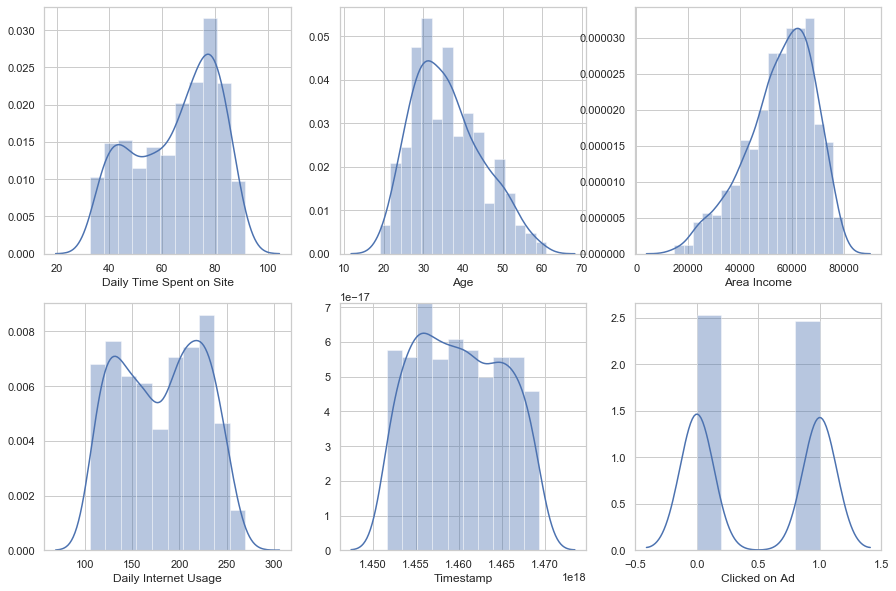

In [160]:
fig, axes = plt.subplots(2, 3,figsize=(15, 10))

sns.set(style="whitegrid")

sns.distplot(data['Daily Time Spent on Site'], ax=axes[0,0])
sns.distplot(data['Age'], ax=axes[0,1])
sns.distplot(data['Area Income'], ax=axes[0,2])
sns.distplot(data['Daily Internet Usage'], ax=axes[1,0])
#g.set_xticklabels(rotation=30)
sns.distplot(data['Timestamp'], ax=axes[1,1])
sns.distplot(data['Clicked on Ad'], ax=axes[1,2])


### 3.2.2 Categorical Data

For each category, we look at each overal percentage

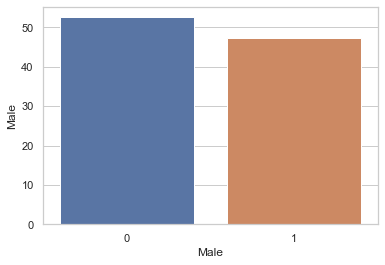

In [161]:
sns.barplot( x="Male", y="Male", data=data, estimator=lambda x: len(x) / len(data) * 100) # we look at the distribution of female vs male


## 3.3 Multivariable Analysis

In this section we will study the distribution of categorical and quantitative variables against other variables to see if we can establish which ones have influence on others. 

We are obviously mostly interested by a given variable influence on Clicked on Ad.

### 3.3.1 Quantitive variables

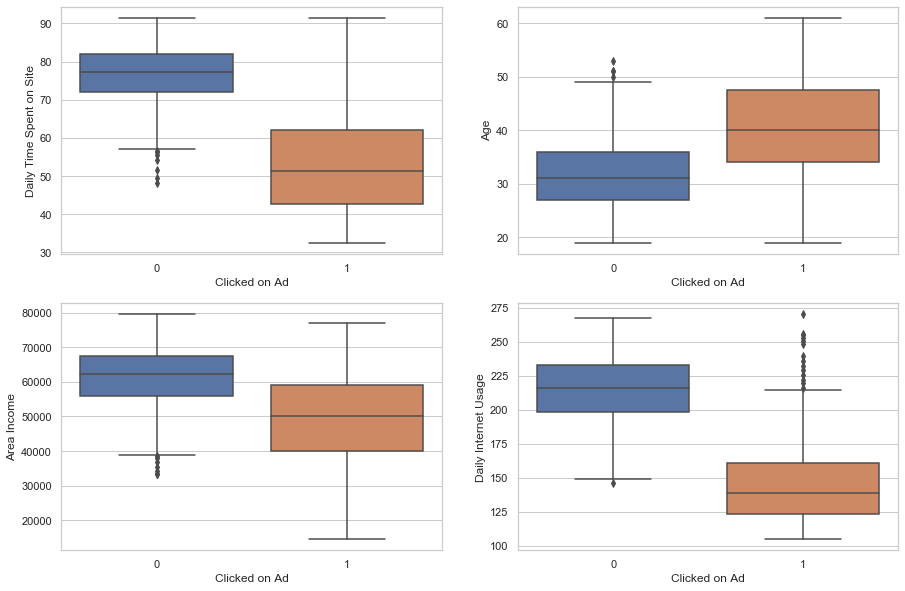

In [162]:
fig, axes = plt.subplots(2, 2,figsize=(15, 10))


sns.boxplot(ax=axes[0,0], y='Daily Time Spent on Site', x="Clicked on Ad", data=data)

sns.boxplot(ax=axes[0,1],x='Clicked on Ad', y="Age", data=data)

sns.boxplot(ax=axes[1,0],y='Area Income', x="Clicked on Ad", data=data)

sns.boxplot(ax=axes[1,1],y='Daily Internet Usage', x="Clicked on Ad", data=data)



### 3.3.2 Categorical variables

# 4. Modeling

In this section, we will build a machine learning model that when inputed with several inputs, will be able to predict if "Clicked on Ad" is 0 or 1. This problem requires a classification algorithm, we will test several algorithms and select the one which has the best capabilities at training. 

<b>Methodology:</b> 

Given the previous analysis, we chose the variables that had a clear influence on "Clicked to Ad" to build the predictive model:
<li> Daily Time Spent on Site</li> 
<li> Age</li> 
<li> Area income</li>
<li> Daily internet usage</li> 

<li> Male</li> 
<li> Country</li> 

City, Timestamp and Ad Topic Line will not be selected for the model since they have almost as many different values as we have lines in the tables, we believe they therefore will not help with the modeling.

For the sake of performance of the algorithm, we will also not select countries.



## Data dropping

We start by dropping the un-desired data.

We will then split our data into train and test sets.

In [163]:
data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04,0


In [164]:
data1 = data
data1 = data1.drop(['City', 'Timestamp','Ad Topic Line','Country'], axis=1)
data1.dropna(axis='rows', inplace=True) # we drop rows with NA values
data1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [165]:
#data1 = pd.get_dummies(data1) # NOT USED
#data1

## Split into train and test sets

In [166]:
test_fraction = 0.2 # we use 20% of the data to test the model
train_fraction = 1-test_fraction # we use 85% of the data to test the model

end_ = int(round(len(data1)*test_fraction,0)) 
init_ = int(round(len(data1)*train_fraction,0)) 

print('train set is made of the first ',init_,' rows,', 'which constitute ',train_fraction*100,' percent of the dataset')
print('test set is made of the last ',end_,' rows', 'which constitute ',test_fraction*100,' percent of the dataset')
print('the sum of the train and test sets is ',init_+end_,' and must equal the length of the whole data set which is',len(data1))

train set is made of the first  687  rows, which constitute  80.0  percent of the dataset
test set is made of the last  172  rows which constitute  20.0  percent of the dataset
the sum of the train and test sets is  859  and must equal the length of the whole data set which is 859


In [167]:
X = data1.drop('Clicked on Ad',axis=1)

column_names = X.columns.tolist()

X = X.astype('float64')


from sklearn.preprocessing import MinMaxScaler # we use the MinMaxScaler to scale our independent data
scaler = MinMaxScaler() 
scaler.fit(X)
X = scaler.transform(X) 
  
X = pd.DataFrame(data=X)    
x_train = X.head(init_)
x_test = X.tail(end_)

Train_data = data1.head(init_)
Test_data = data1.tail(end_)
    
y_train = np.asarray(Train_data['Clicked on Ad'])
y_test = np.asarray(Test_data['Clicked on Ad'])

## Classification model testing

In [168]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dict_classifiers = {
    'Logistic Regression' : LogisticRegression(solver='lbfgs', max_iter=50000), 
    'Nearest Neighbors' : KNeighborsClassifier(),
    'Support Vector Machine' : SVC(gamma= 'auto'),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Naives Bayes' : GaussianNB()
}

no_classifiers = len(dict_classifiers.keys()) #

def batch_classify(X_train, y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)),
                             columns=['classifier','train_score','training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, y_train)
        df_results.loc[count, 'classifier'] = key
        df_results.loc[count, 'train_score'] = train_score
        df_results.loc[count, 'training_time'] = t_diff

        count = count + 1
    return df_results

df_results = batch_classify(X_train, y_train)
print(df_results)

               classifier  train_score  training_time
0     Logistic Regression     0.973799       0.000000
1       Nearest Neighbors     0.970888       0.000000
2  Support Vector Machine     0.967977       0.000000
3           Decision Tree     1.000000       0.000000
4           Random Forest     1.000000       0.359375
5            Naives Bayes     0.966521       0.000000


### Development of a Random Forest classifier

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
rf = RandomForestClassifier(random_state=2)
rf.fit(x_train, y_train)

yhat = rf.predict(x_test)
yhat = [int(i) for i in yhat]
y_test = [int(i) for i in y_test]
yhat_prob = rf.predict_proba(x_test)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, yhat)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

print('roc_auc: ', roc_auc)
print()
print('accuracy score: ', accuracy_score(y_test,yhat))
print()
print('confusion matrix: ')
print(confusion_matrix(y_test,yhat))
print()
print('classification report:')
print(classification_report(y_test,yhat))

roc_auc:  0.9675601374570447

accuracy score:  0.9651162790697675

confusion matrix: 
[[74  1]
 [ 5 92]]

classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        75
           1       0.99      0.95      0.97        97

    accuracy                           0.97       172
   macro avg       0.96      0.97      0.96       172
weighted avg       0.97      0.97      0.97       172



### Feature importance

<BarContainer object of 5 artists>

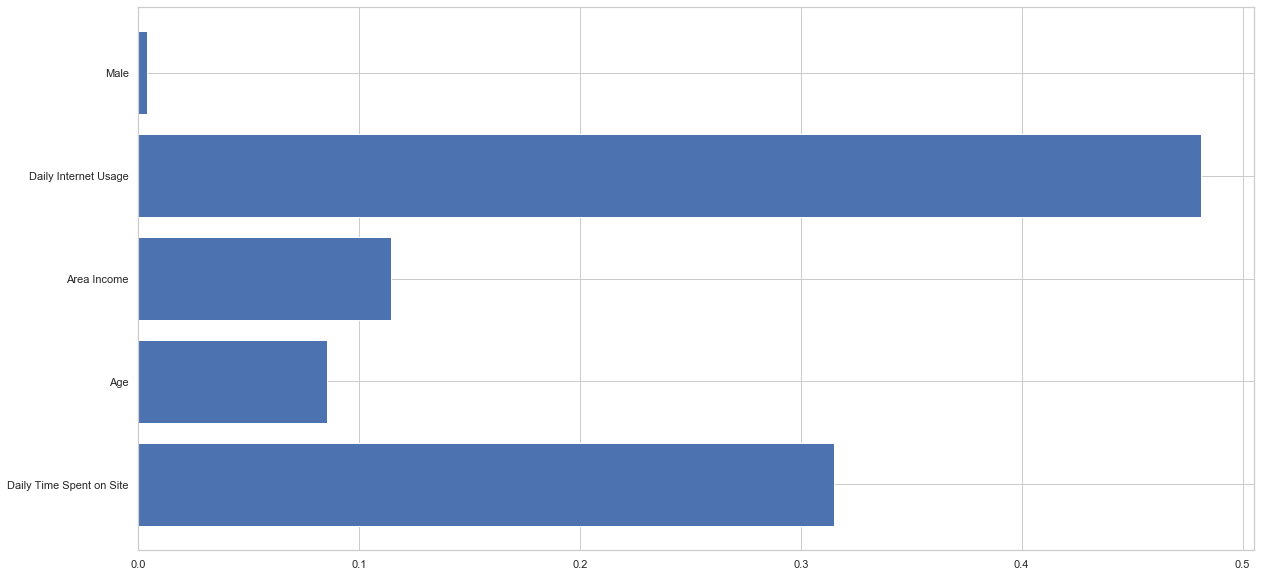

In [170]:
feature_importance = rf.feature_importances_
f, ax = plt.subplots(figsize=(20,10))
plt.barh(column_names,rf.feature_importances_)

## The End!